In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
path = 'yelp_data/health_text_sentiment.csv'

In [4]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)


df = df[['stars',
 'text']]

## split 1 and  5 stars

In [5]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
# data.stars.replace(1,0,inplace=True)
# data.stars.replace(5,1,inplace=True)

data.head()

,stars,text
0,1,Please stay away from this place if you can! I...
1,5,My husband has been a patient of Dr. Byrne for...
4,1,I wish I could give 0 stars. Worst office I've...
5,1,I went to the emergency room because i was hav...
6,5,Dr. Byrne is an excellent doctor with all the ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53714 entries, 0 to 64005
Data columns (total 2 columns):
stars    53714 non-null int64
text     53714 non-null object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


## linearSVC

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

In [ ]:
data = df.loc[:5000]

In [ ]:
data.info()

In [8]:
# split
review = data['text'].values.astype(str)
sentiments = data['stars'].values

## Vectorizer

In [16]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(review)

## train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(vectors, sentiments,
                                                    test_size=0.33, 
                                                    random_state=42)

## classifier

In [ ]:
# %%time
# # SVM classifier
# classifier = SVC(kernel="linear")
# # train
# classifier.fit(X_train, y_train)

# # lets make our predictions
# preds = classifier.predict(X_test)
# acc = accuracy_score(y_test, preds)

# print('accuracy: {}'.format(acc))

In [18]:
%%time
# SVM classifier
classifier = LinearSVC()
# train
classifier.fit(X_train, y_train)

# lets make our predictions
preds = classifier.predict(X_test)
acc = accuracy_score(y_test, preds)

print('accuracy: {}'.format(acc))

accuracy: 0.9813268644928353
CPU times: user 1.75 s, sys: 0 ns, total: 1.75 s
Wall time: 1.75 s


array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [109]:
cvals = [1,2,3,4,5,6,7,8,9,10,15,20]
results = dict()

In [110]:
%%time
for c in cvals:
    classifier = LinearSVC(C=c)
    # train
    classifier.fit(X_train, y_train)

    # lets make our predictions
    preds = classifier.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[c] = acc

CPU times: user 1min 2s, sys: 0 ns, total: 1min 2s
Wall time: 1min 2s


In [111]:
results

{1: 0.9813268644928353,
 2: 0.9816653503328444,
 3: 0.9817217646395126,
 4: 0.9818345932528489,
 5: 0.9818910075595171,
 6: 0.9818345932528489,
 7: 0.9818345932528489,
 8: 0.9818910075595171,
 9: 0.9817217646395126,
 10: 0.9816653503328444,
 15: 0.9816653503328444,
 20: 0.9817781789461808}

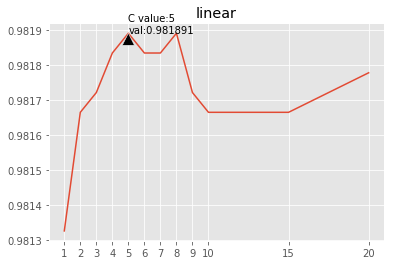

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(results.keys())
y=list(results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'C value:{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'))
plt.xticks(x)
plt.title('linear')
plt.show()

In [118]:
%%time
# SVM classifier
classifier = LinearSVC(C=5)
# train
classifier.fit(X_train, y_train)

# lets make our predictions
preds = classifier.predict(X_test)
acc = accuracy_score(y_test, preds)

print('accuracy: {}'.format(acc))

accuracy: 0.9818910075595171
CPU times: user 4.12 s, sys: 15.6 ms, total: 4.14 s
Wall time: 4.12 s


## Evaluate

In [119]:
print(accuracy_score(y_test, preds))

0.9818910075595171


In [120]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      7241
           5       0.99      0.98      0.98     10485

   micro avg       0.98      0.98      0.98     17726
   macro avg       0.98      0.98      0.98     17726
weighted avg       0.98      0.98      0.98     17726



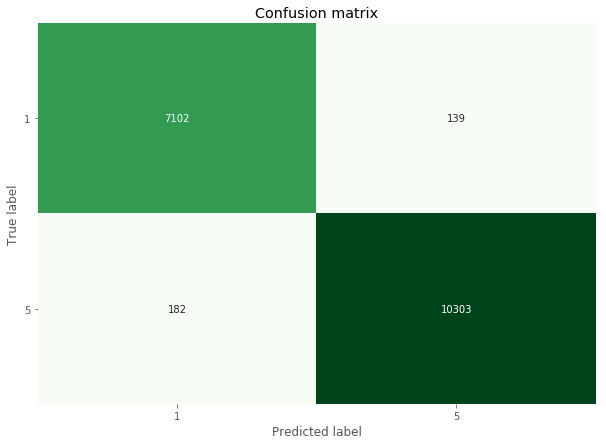

In [123]:
labels = [1,5]
cm = confusion_matrix(y_test, preds,labels=labels)
plt.figure(figsize = (10,7))
g = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens",xticklabels=True,yticklabels=True)
g.set_yticklabels(labels, rotation =0)
g.set_xticklabels(labels, rotation =0)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## display coefficients


In [ ]:
feature_names = np.array(vectorizer.get_feature_names())
sorted_coef_index = classifier.coef_[0].argsort()

In [127]:
print('Lowest 10  Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))

Lowest 10  Coef: 
['rude' 'not' 'horrible' 'told' 'worst' 'unprofessional' 'terrible'
 'not recommend' 'said' 'elsewhere']



In [141]:
print('Lowest 10  Coef:')
print('----------------')
for i in feature_names[sorted_coef_index][:10]:
    print('- {}'.format(i))

Lowest 10  Coef:
----------------
- rude
- not
- horrible
- told
- worst
- unprofessional
- terrible
- not recommend
- said
- elsewhere


In [142]:
print('Highest 10  Coef:')
print('----------------')
for i in feature_names[sorted_coef_index][-10:]:
    print('- {}'.format(i))

Highest 10  Coef:
----------------
- wonderful
- dr
- excellent
- friendly
- thank
- awesome
- best
- love
- amazing
- great


In [143]:
#https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    #plt.title('asdf')
    plt.show()

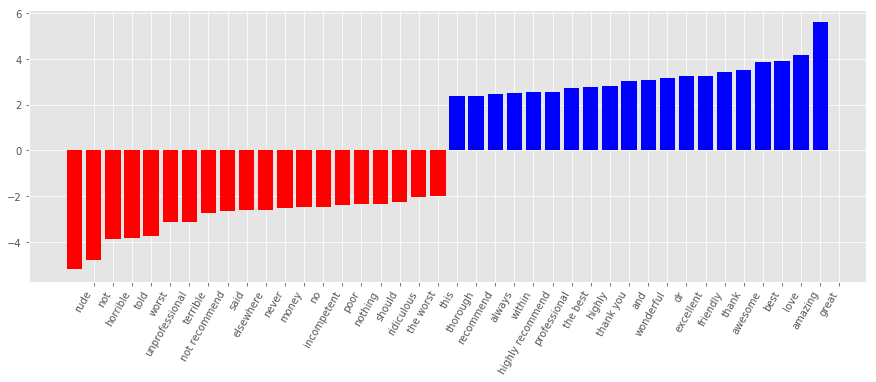

In [144]:
plot_coefficients(classifier, vectorizer.get_feature_names())